<a href="https://colab.research.google.com/github/fouzanhaider/Network-Traffic-Scanner/blob/main/networktraffictrafficscanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5061 - loss: 0.6932 - val_accuracy: 0.5133 - val_loss: 0.6933
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5032 - loss: 0.6928 - val_accuracy: 0.5133 - val_loss: 0.6934
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5207 - loss: 0.6926 - val_accuracy: 0.5133 - val_loss: 0.6937
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5191 - loss: 0.6922 - val_accuracy: 0.5133 - val_loss: 0.6939
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5194 - loss: 0.6918 - val_accuracy: 0.5067 - val_loss: 0.6942
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5089 - loss: 0.6918 - val_accuracy: 0.5033 - val_loss: 0.6946
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5210 - loss: 0.6907 - val_accuracy: 0.4933 - val_loss: 0.6951
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5331 - loss: 0.6913 - val_accuracy: 0.4967 - val_loss: 0.6956
E

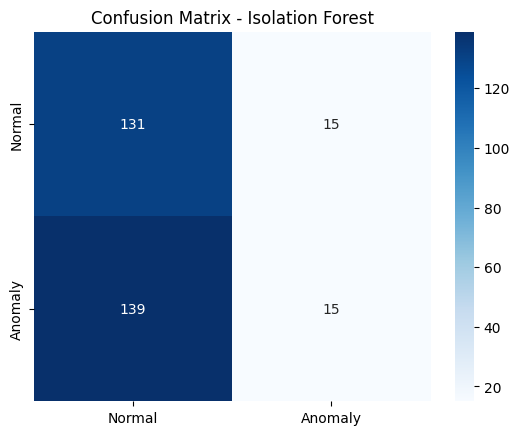


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       146
           1       0.48      0.52      0.50       154

    accuracy                           0.47       300
   macro avg       0.46      0.47      0.46       300
weighted avg       0.47      0.47      0.47       300


LSTM Model Accuracy on Test Data:
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5138 - loss: 0.6972 
LSTM Test Accuracy: 47.333%

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.56      0.52       146
           1       0.50      0.42      0.45       154

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.49      0.49      0.48       300



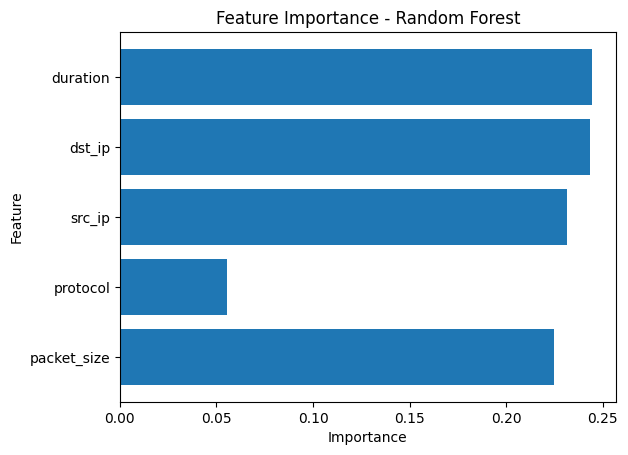

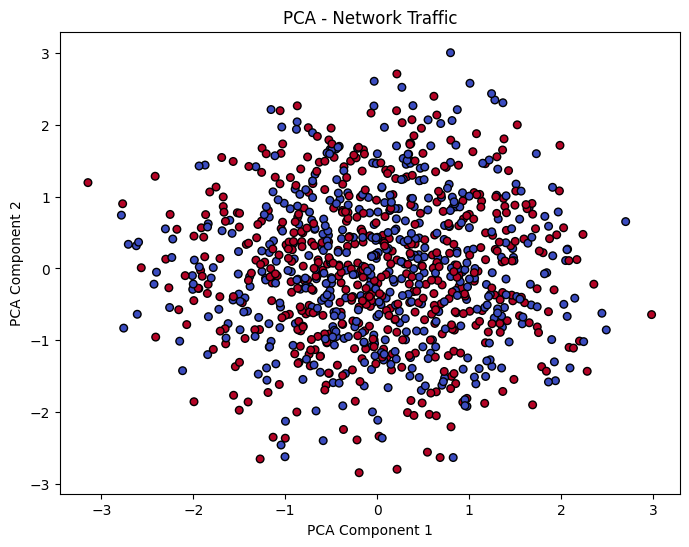

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import seaborn as sns

# Simulated network traffic dataset (for demonstration purposes)
np.random.seed(42)

# Simulate network traffic features
data = pd.DataFrame({
    'packet_size': np.random.randint(50, 1500, 1000),
    'protocol': np.random.choice(['TCP', 'UDP', 'ICMP'], 1000),
    'src_ip': np.random.randint(1, 255, 1000),
    'dst_ip': np.random.randint(1, 255, 1000),
    'duration': np.random.uniform(1, 60, 1000),  # duration in seconds
    'label': np.random.choice([0, 1], 1000)  # 0: benign, 1: malicious
})

# Feature encoding for non-numeric columns
data['protocol'] = data['protocol'].map({'TCP': 1, 'UDP': 2, 'ICMP': 3})

# Features and target variable
X = data.drop(columns=['label'])
y = data['label']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ------------------------------------------
# Model 1: Random Forest Classifier
# ------------------------------------------

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model
rf_model = grid_search_rf.best_estimator_

# Prediction with the optimized Random Forest model
y_pred_rf = rf_model.predict(X_test)

# ------------------------------------------
# Model 2: Isolation Forest (Anomaly Detection)
# ------------------------------------------

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
y_pred_anomalies = iso_forest.fit_predict(X_test)
y_pred_anomalies = np.where(y_pred_anomalies == -1, 1, 0)  # Convert to 1 for anomaly, 0 for normal

# ------------------------------------------
# Model 3: XGBoost (eXtreme Gradient Boosting)
# ------------------------------------------

# XGBoost model for classification
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# XGBoost Prediction
y_pred_xgb = xgb_model.predict(X_test)

# ------------------------------------------
# Model 4: LSTM (Long Short-Term Memory)
# ------------------------------------------

# Reshape data for LSTM (time-series format)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=100, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, activation='relu', return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))

# LSTM Prediction
y_pred_lstm = (lstm_model.predict(X_test_reshaped) > 0.5).astype(int)

# ------------------------------------------
# Model 5: DBSCAN (Density-Based Spatial Clustering)
# ------------------------------------------

# DBSCAN clustering for anomaly detection
dbscan = DBSCAN(eps=0.5, min_samples=10)
y_pred_dbscan = dbscan.fit_predict(X_train)

# Replace noise points (-1) with label 0
y_pred_dbscan_safe = np.where(y_pred_dbscan == -1, 0, y_pred_dbscan)

# ------------------------------------------
# Evaluation: Classification Reports and Confusion Matrices
# ------------------------------------------

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nIsolation Forest Confusion Matrix (Anomaly Detection):")
cm_anomaly = confusion_matrix(y_test, y_pred_anomalies)
sns.heatmap(cm_anomaly, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title("Confusion Matrix - Isolation Forest")
plt.show()

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nLSTM Model Accuracy on Test Data:")
lstm_accuracy = lstm_model.evaluate(X_test_reshaped, y_test)
print(f"LSTM Test Accuracy: {lstm_accuracy[1]*100:.3f}%")

# ------------------------------------------
# Optional: Ensemble Model (Voting Classifier)
# ------------------------------------------

ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='hard')
ensemble_model.fit(X_train, y_train)

# Predictions with ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

print("\nEnsemble Model Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# ------------------------------------------
# Optional: Feature Importance Visualization (for Random Forest)
# ------------------------------------------

feature_importances = rf_model.feature_importances_
plt.barh(data.columns[:-1], feature_importances)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# ------------------------------------------
# Optional: PCA Visualization
# ------------------------------------------

# Apply PCA for dimensionality reduction and visualize in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')
plt.title('PCA - Network Traffic')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
